In [ ]:
import torch
import numpy as np
from tools import repeat_experiment 

### Figure 1

Running Experiments: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


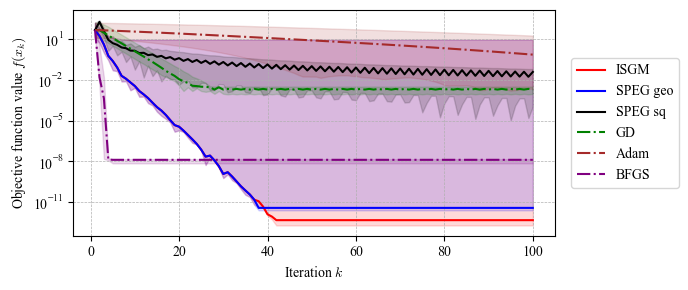


=== Performance Summary (10 runs) ===


,Method,Mean Min Error,Median Min Error,Std Dev
0,ISGM,$1.29 \times 10^{1}$,$4.90 \times 10^{-13}$,$3.03 \times 10^{1}$
1,SPEG geo,$1.29 \times 10^{1}$,$3.90 \times 10^{-12}$,$3.03 \times 10^{1}$
2,SPEG sq,$1.42 \times 10^{-3}$,$7.72 \times 10^{-7}$,$4.25 \times 10^{-3}$
3,GD,$8.94 \times 10^{-4}$,$7.82 \times 10^{-4}$,$4.80 \times 10^{-4}$
4,Adam,$1.60 \times 10^{1}$,$6.92 \times 10^{-1}$,$3.14 \times 10^{1}$
5,BFGS,$1.10 \times 10^{-8}$,$1.32 \times 10^{-8}$,$4.53 \times 10^{-9}$



=== LaTeX Code ===
\begin{tabular}{llll}
\toprule
Method & Mean Min Error & Median Min Error & Std Dev \\
\midrule
ISGM & $1.29 \times 10^{1}$ & $4.90 \times 10^{-13}$ & $3.03 \times 10^{1}$ \\
SPEG geo & $1.29 \times 10^{1}$ & $3.90 \times 10^{-12}$ & $3.03 \times 10^{1}$ \\
SPEG sq & $1.42 \times 10^{-3}$ & $7.72 \times 10^{-7}$ & $4.25 \times 10^{-3}$ \\
GD & $8.94 \times 10^{-4}$ & $7.82 \times 10^{-4}$ & $4.80 \times 10^{-4}$ \\
Adam & $1.60 \times 10^{1}$ & $6.92 \times 10^{-1}$ & $3.14 \times 10^{1}$ \\
BFGS & $1.10 \times 10^{-8}$ & $1.32 \times 10^{-8}$ & $4.53 \times 10^{-9}$ \\
\bottomrule
\end{tabular}



In [15]:
def f(x):
    return np.sum([np.abs(x - i/100) + np.abs(x + i/100) - 2*i/100 for i in range(99)])

def f_torch(x):
    i = torch.arange(99, device=x.device) / 100.0
    term = torch.abs(x - i) + torch.abs(x + i) - 2*i
    return torch.sum(term)

num_runs = 10       
iterations = 100
max_iter = 100

repeat_experiment(f, f_torch, num_runs, max_iter, latex_code=True, save_path="figure 1")

### Figure 2

Running Experiments: 100%|██████████| 100/100 [00:05<00:00, 17.95it/s]


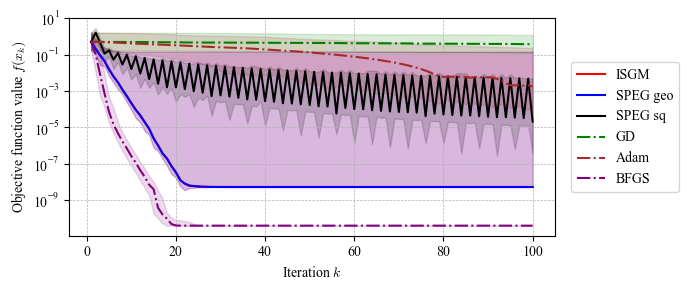


=== Performance Summary (100 runs) ===


,Method,Mean Min Error,Median Min Error,Std Dev
0,ISGM,$2.79 \times 10^{-1}$,$2.68 \times 10^{-9}$,$6.78 \times 10^{-1}$
1,SPEG geo,$2.79 \times 10^{-1}$,$2.68 \times 10^{-9}$,$6.78 \times 10^{-1}$
2,SPEG sq,$9.01 \times 10^{-6}$,$4.28 \times 10^{-9}$,$6.18 \times 10^{-5}$
3,GD,$9.18 \times 10^{-1}$,$3.74 \times 10^{-1}$,$1.27 \times 10^{0}$
4,Adam,$3.09 \times 10^{-1}$,$7.49 \times 10^{-5}$,$6.90 \times 10^{-1}$
5,BFGS,$5.17 \times 10^{-11}$,$4.03 \times 10^{-11}$,$2.50 \times 10^{-11}$



=== LaTeX Code ===
\begin{tabular}{llll}
\toprule
Method & Mean Min Error & Median Min Error & Std Dev \\
\midrule
ISGM & $2.79 \times 10^{-1}$ & $2.68 \times 10^{-9}$ & $6.78 \times 10^{-1}$ \\
SPEG geo & $2.79 \times 10^{-1}$ & $2.68 \times 10^{-9}$ & $6.78 \times 10^{-1}$ \\
SPEG sq & $9.01 \times 10^{-6}$ & $4.28 \times 10^{-9}$ & $6.18 \times 10^{-5}$ \\
GD & $9.18 \times 10^{-1}$ & $3.74 \times 10^{-1}$ & $1.27 \times 10^{0}$ \\
Adam & $3.09 \times 10^{-1}$ & $7.49 \times 10^{-5}$ & $6.90 \times 10^{-1}$ \\
BFGS & $5.17 \times 10^{-11}$ & $4.03 \times 10^{-11}$ & $2.50 \times 10^{-11}$ \\
\bottomrule
\end{tabular}



In [13]:
p = 1.3
q = 1.2

def f(x):
    x = np.asarray(x)
    
    res = np.zeros_like(x, dtype=float)
    
    mask_high = (x >= 0.5)              
    mask_mid  = (x >= 0) & (x < 0.5)    
    mask_low  = (x < 0)                 
    
    res[mask_high] = 3 * (x[mask_high] - 0.5) + (0.5**q) / q
    res[mask_mid]  = (np.abs(x[mask_mid])**q) / q
    res[mask_low]  = (np.abs(x[mask_low])**p) / p
    
    return np.sum(res)

def f_torch(x):
    val_high = 3 * (x - 0.5) + (0.5**q) / q
    val_mid  = (torch.abs(x)**q) / q
    val_low  = (torch.abs(x)**p) / p
    
    out = torch.where(x >= 0.5, val_high, 
                      torch.where(x >= 0, val_mid, val_low))
    
    return torch.sum(out)

num_runs = 100     
iterations = 100
max_iter = 100

repeat_experiment(f, f_torch, num_runs, max_iter, latex_code=True, save_path="figure 2")

### Figure 3

Running Experiments: 100%|██████████| 50/50 [00:01<00:00, 28.95it/s]


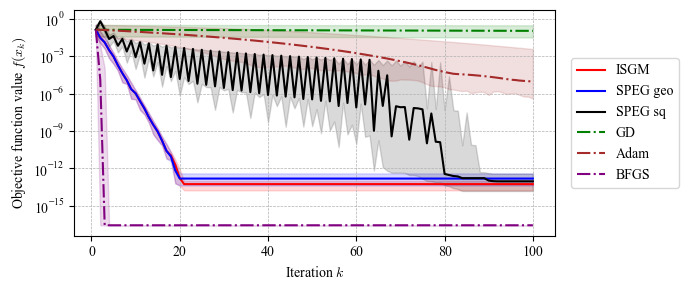


=== Performance Summary (50 runs) ===


,Method,Mean Min Error,Median Min Error,Std Dev
0,ISGM,$3.54 \times 10^{-2}$,$5.49 \times 10^{-14}$,$1.08 \times 10^{-1}$
1,SPEG geo,$3.54 \times 10^{-2}$,$1.53 \times 10^{-13}$,$1.08 \times 10^{-1}$
2,SPEG sq,$1.72 \times 10^{-6}$,$9.21 \times 10^{-14}$,$7.61 \times 10^{-6}$
3,GD,$2.08 \times 10^{-1}$,$1.05 \times 10^{-1}$,$2.47 \times 10^{-1}$
4,Adam,$3.80 \times 10^{-2}$,$1.33 \times 10^{-7}$,$1.11 \times 10^{-1}$
5,BFGS,$2.39 \times 10^{-17}$,$2.78 \times 10^{-17}$,$9.39 \times 10^{-18}$



=== LaTeX Code ===
\begin{tabular}{llll}
\toprule
Method & Mean Min Error & Median Min Error & Std Dev \\
\midrule
ISGM & $3.54 \times 10^{-2}$ & $5.49 \times 10^{-14}$ & $1.08 \times 10^{-1}$ \\
SPEG geo & $3.54 \times 10^{-2}$ & $1.53 \times 10^{-13}$ & $1.08 \times 10^{-1}$ \\
SPEG sq & $1.72 \times 10^{-6}$ & $9.21 \times 10^{-14}$ & $7.61 \times 10^{-6}$ \\
GD & $2.08 \times 10^{-1}$ & $1.05 \times 10^{-1}$ & $2.47 \times 10^{-1}$ \\
Adam & $3.80 \times 10^{-2}$ & $1.33 \times 10^{-7}$ & $1.11 \times 10^{-1}$ \\
BFGS & $2.39 \times 10^{-17}$ & $2.78 \times 10^{-17}$ & $9.39 \times 10^{-18}$ \\
\bottomrule
\end{tabular}



In [6]:
# Huber Loss
def f(x):    
    delta = 0.5
    x = np.asarray(x)
    abs_x = np.abs(x)
    
    res = np.zeros_like(x, dtype=float)
    
    mask_in  = (abs_x <= delta)  
    mask_out = (abs_x > delta)   
    
    res[mask_in]  = 0.5 * (x[mask_in]**2)
    res[mask_out] = delta * (abs_x[mask_out] - 0.5 * delta)
    
    return np.sum(res)

def f_torch(x):
    delta = 0.5
    abs_x = torch.abs(x)
    
    out = torch.where(abs_x <= delta, 
                      0.5 * (x**2), 
                      delta * (abs_x - 0.5 * delta))
    
    return torch.sum(out)

num_runs = 50       
iterations = 100
max_iter = 100

repeat_experiment(f, f_torch, num_runs, max_iter, latex_code=True, save_path="figure 3")

### Figure 4

Running Experiments: 100%|██████████| 50/50 [00:01<00:00, 35.09it/s]


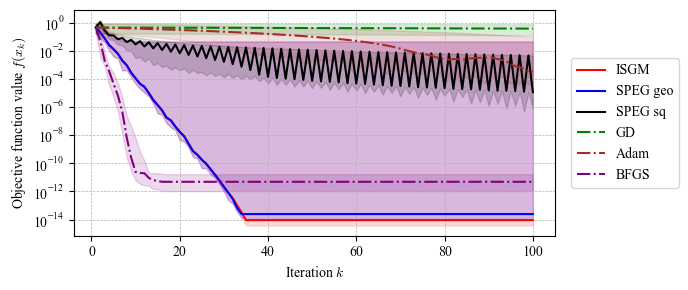


=== Performance Summary (50 runs) ===


,Method,Mean Min Error,Median Min Error,Std Dev
0,ISGM,$6.73 \times 10^{-2}$,$9.15 \times 10^{-15}$,$1.31 \times 10^{-1}$
1,SPEG geo,$6.73 \times 10^{-2}$,$2.46 \times 10^{-14}$,$1.31 \times 10^{-1}$
2,SPEG sq,$1.43 \times 10^{-5}$,$3.03 \times 10^{-9}$,$8.36 \times 10^{-5}$
3,GD,$4.81 \times 10^{-1}$,$3.85 \times 10^{-1}$,$4.19 \times 10^{-1}$
4,Adam,$8.30 \times 10^{-2}$,$2.47 \times 10^{-5}$,$1.50 \times 10^{-1}$
5,BFGS,$8.03 \times 10^{-12}$,$4.87 \times 10^{-12}$,$7.96 \times 10^{-12}$



=== LaTeX Code ===
\begin{tabular}{llll}
\toprule
Method & Mean Min Error & Median Min Error & Std Dev \\
\midrule
ISGM & $6.73 \times 10^{-2}$ & $9.15 \times 10^{-15}$ & $1.31 \times 10^{-1}$ \\
SPEG geo & $6.73 \times 10^{-2}$ & $2.46 \times 10^{-14}$ & $1.31 \times 10^{-1}$ \\
SPEG sq & $1.43 \times 10^{-5}$ & $3.03 \times 10^{-9}$ & $8.36 \times 10^{-5}$ \\
GD & $4.81 \times 10^{-1}$ & $3.85 \times 10^{-1}$ & $4.19 \times 10^{-1}$ \\
Adam & $8.30 \times 10^{-2}$ & $2.47 \times 10^{-5}$ & $1.50 \times 10^{-1}$ \\
BFGS & $8.03 \times 10^{-12}$ & $4.87 \times 10^{-12}$ & $7.96 \times 10^{-12}$ \\
\bottomrule
\end{tabular}



In [5]:
p = 1.3

# j(x) = (|x|^p) / p
def f(x):
    x = np.asarray(x)
    return np.sum((np.abs(x)**p) / p)

def f_torch(x):
    return torch.sum((torch.abs(x)**p) / p)

num_runs = 50       
iterations = 100
max_iter = 100

repeat_experiment(f, f_torch, num_runs, max_iter, latex_code=True, save_path="figure 4")